# Sprint 9: Machine Learning in Business #

# Preliminaries #

In [1]:
# Load libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# Load data

df_geo_0 = pd.read_csv('/datasets/geo_data_0.csv')
df_geo_1 = pd.read_csv('/datasets/geo_data_1.csv')
df_geo_2 = pd.read_csv('/datasets/geo_data_2.csv')

The purpose of this project is to create a model for the OilyGiant mining company to predict which region will have the most lucrative wells. I will examine the data, train a model, estimate profit margins with bootstrapping, and make a final recommendation.

# Examine the Data #

In [3]:
# Examine the df_geo_0, df_geo_1, and df_geo_2 dataframes

display(df_geo_0.info())
display(df_geo_0)
print()
display(df_geo_1.info())
display(df_geo_1)
print()
display(df_geo_2.info())
display(df_geo_2)
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...,...
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...,...
99995,4GxBu,-1.777037,1.125220,6.263374,172.327046
99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846
99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080
99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253


In [4]:
# Create functions to examine columns

def histo(df, column):
    if (len(df[column].unique()) < 100): bins = len(df[column].unique())
    else: bins = 100

    display(df[column].describe())
    plt.hist(df[column], bins=bins)
    plt.xlabel(column)
    plt.ylabel('Number of Observations')
    plt.title(f'Histogram for {column}')
    plt.show()
    
def examine(df):
    display(df['id'].describe())
    print()

    columns = ['f0', 'f1', 'f2', 'product']
    for column in columns:
        histo(df, column)
        print()

count     100000
unique     99990
top        HZww2
freq           2
Name: id, dtype: object

count    100000.000000
mean          0.500419
std           0.871832
min          -1.408605
25%          -0.072580
50%           0.502360
75%           1.073581
max           2.362331
Name: f0, dtype: float64

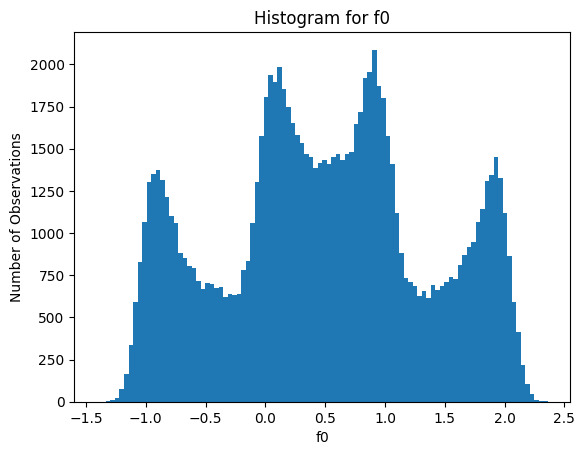

count    100000.000000
mean          0.250143
std           0.504433
min          -0.848218
25%          -0.200881
50%           0.250252
75%           0.700646
max           1.343769
Name: f1, dtype: float64

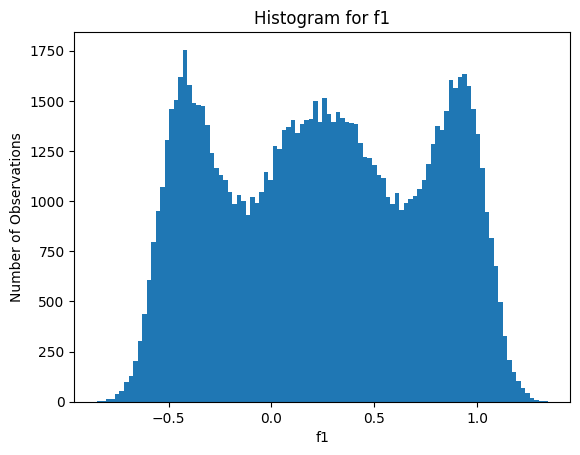

count    100000.000000
mean          2.502647
std           3.248248
min         -12.088328
25%           0.287748
50%           2.515969
75%           4.715088
max          16.003790
Name: f2, dtype: float64

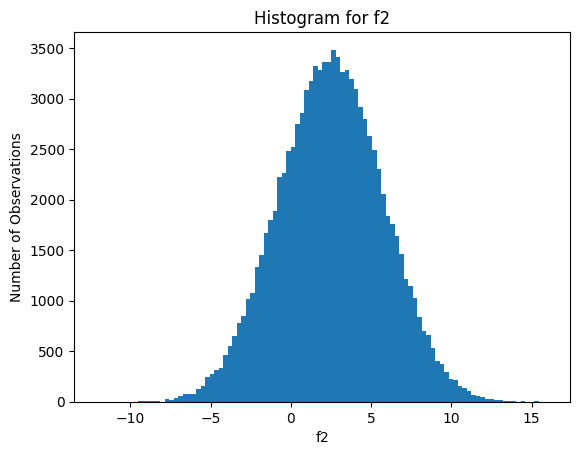

count    100000.000000
mean         92.500000
std          44.288691
min           0.000000
25%          56.497507
50%          91.849972
75%         128.564089
max         185.364347
Name: product, dtype: float64

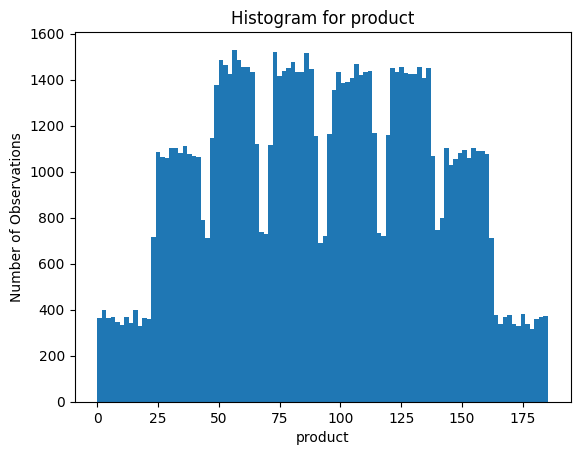

In [5]:
# Examine all columns from the df_geo_0 dataframe

examine(df_geo_0)

count     100000
unique     99996
top        wt4Uk
freq           2
Name: id, dtype: object

count    100000.000000
mean          1.141296
std           8.965932
min         -31.609576
25%          -6.298551
50%           1.153055
75%           8.621015
max          29.421755
Name: f0, dtype: float64

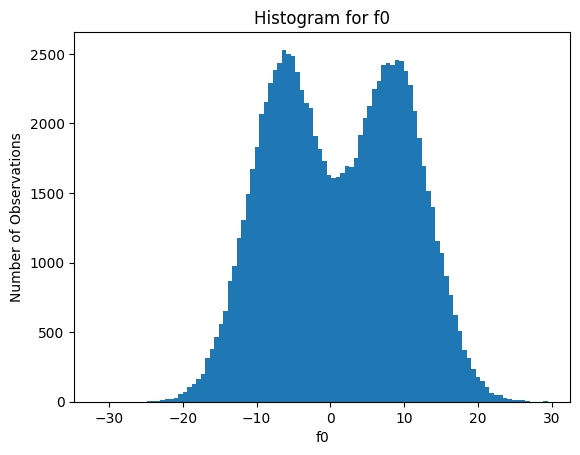

count    100000.000000
mean         -4.796579
std           5.119872
min         -26.358598
25%          -8.267985
50%          -4.813172
75%          -1.332816
max          18.734063
Name: f1, dtype: float64

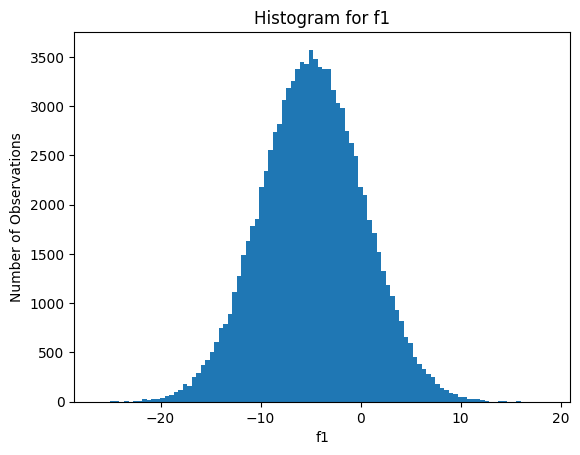

count    100000.000000
mean          2.494541
std           1.703572
min          -0.018144
25%           1.000021
50%           2.011479
75%           3.999904
max           5.019721
Name: f2, dtype: float64

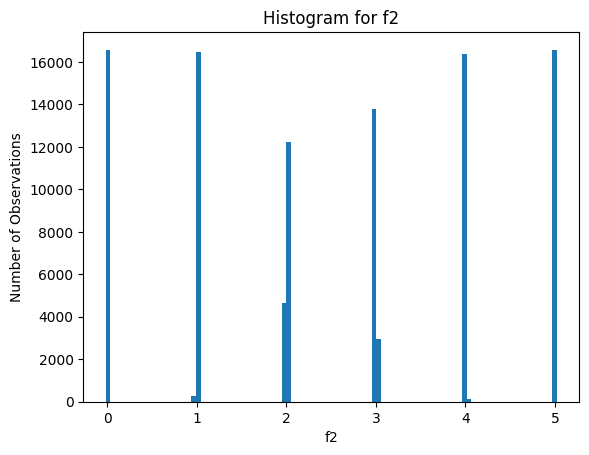

count    100000.000000
mean         68.825000
std          45.944423
min           0.000000
25%          26.953261
50%          57.085625
75%         107.813044
max         137.945408
Name: product, dtype: float64

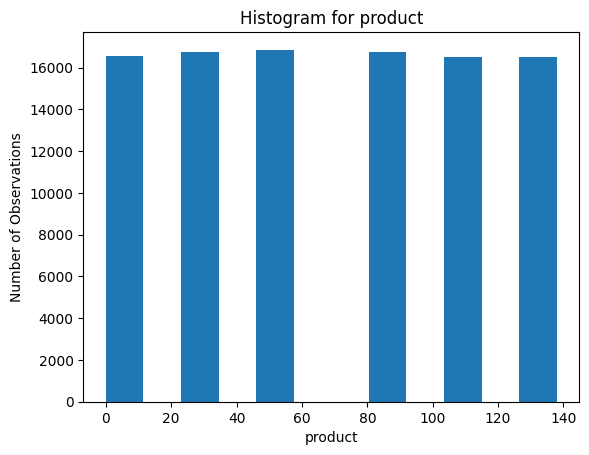

In [6]:
# Examine all columns from the df_geo_1 dataframe

examine(df_geo_1)

count     100000
unique     99996
top        KUPhW
freq           2
Name: id, dtype: object

count    100000.000000
mean          0.002023
std           1.732045
min          -8.760004
25%          -1.162288
50%           0.009424
75%           1.158535
max           7.238262
Name: f0, dtype: float64

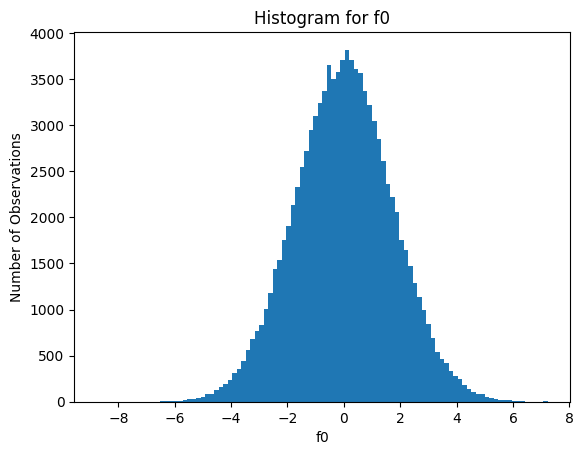

count    100000.000000
mean         -0.002081
std           1.730417
min          -7.084020
25%          -1.174820
50%          -0.009482
75%           1.163678
max           7.844801
Name: f1, dtype: float64

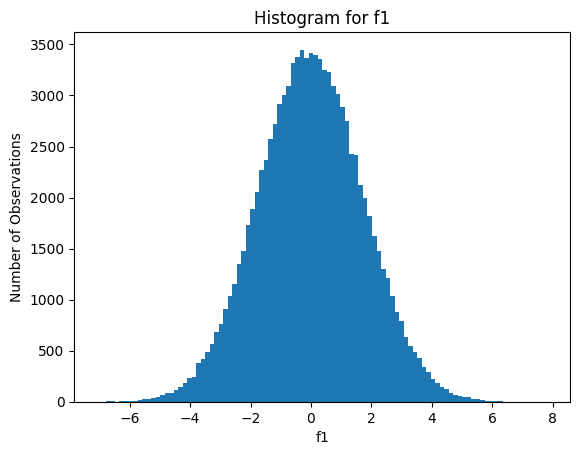

count    100000.000000
mean          2.495128
std           3.473445
min         -11.970335
25%           0.130359
50%           2.484236
75%           4.858794
max          16.739402
Name: f2, dtype: float64

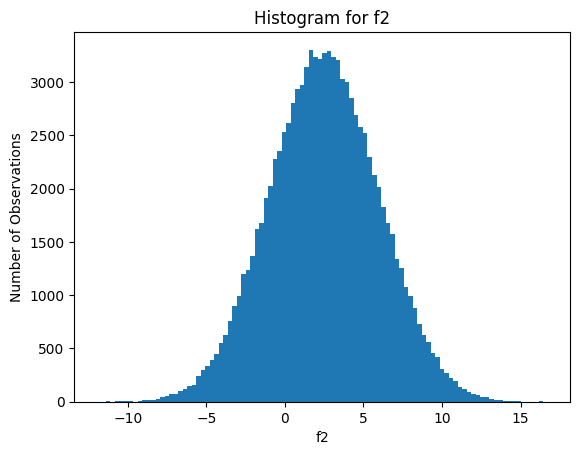

count    100000.000000
mean         95.000000
std          44.749921
min           0.000000
25%          59.450441
50%          94.925613
75%         130.595027
max         190.029838
Name: product, dtype: float64

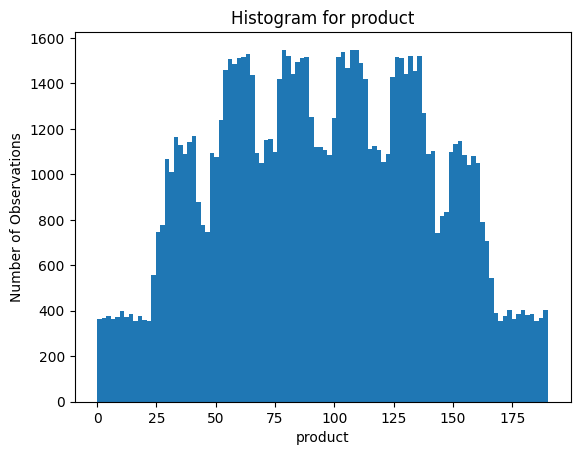

In [7]:
# Examine all columns from the df_geo_2 dataframe

examine(df_geo_2)

In [8]:
# Examine some columns further

print('Duplicated values for the id column:')
print('Region 0:', len(df_geo_0['id'])-len(df_geo_0['id'].unique()))
print('Region 1:', len(df_geo_1['id'])-len(df_geo_1['id'].unique()))
print('Region 2:', len(df_geo_2['id'])-len(df_geo_2['id'].unique()))
print()
print('Unique values for the id column in region 1:')
print(sorted(df_geo_1['product'].unique()))

Duplicated values for the id column:
Region 0: 10
Region 1: 4
Region 2: 4

Unique values for the id column in region 1:
[0.0, 3.179102583207246, 26.95326103153969, 30.132363614746943, 53.90652206307938, 57.08562464628662, 80.85978309461906, 84.03888567782631, 107.81304412615876, 110.992146709366, 134.76630515769844, 137.94540774090564]


f2 for region 1


count    16572.000000
mean         0.000010
std          0.005017
min         -0.018144
25%         -0.003380
50%         -0.000022
75%          0.003385
max          0.020273
Name: f2, dtype: float64

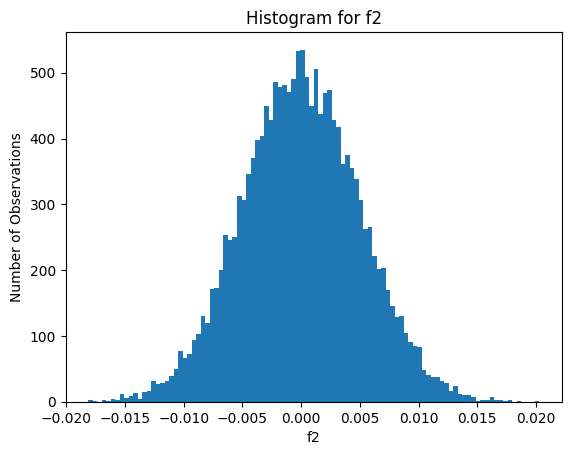


product for region 1


count    16774.000000
mean        28.527461
std          1.589525
min         26.953261
25%         26.953261
50%         26.953261
75%         30.132364
max         30.132364
Name: product, dtype: float64

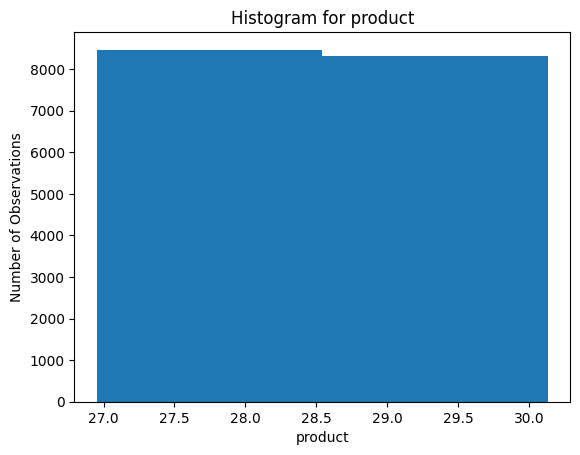


product for region 0


count    15928.000000
mean        35.941660
std          8.227367
min         20.009467
25%         28.993976
50%         35.811945
75%         42.625620
max         49.999998
Name: product, dtype: float64

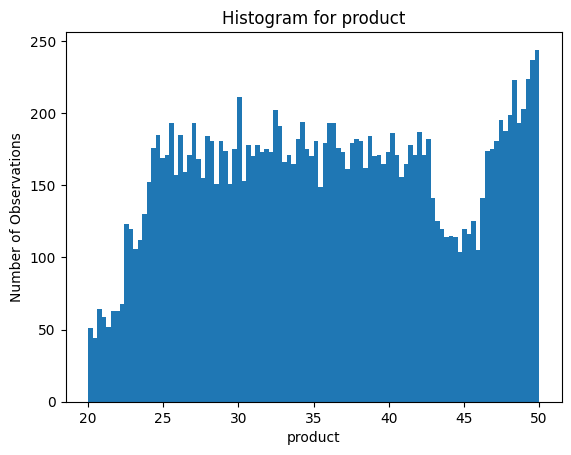

In [9]:
# Examine some columns further with plots

print('f2 for region 1')
histo(df_geo_1['f2'][df_geo_1['f2'] < 0.5].to_frame(name='f2'), 'f2')
print()
print('product for region 1')
histo(df_geo_1['product'][(df_geo_1['product'] > 25) & (df_geo_1['product'] < 35)].to_frame(name='product'), 'product')
print()
print('product for region 0')
histo(df_geo_0['product'][(df_geo_0['product'] > 20) & (df_geo_0['product'] < 50)].to_frame(name='product'), 'product')

The data look good overall. The columns all have the proper data types and no missing data. 

The id column has some repeat values (10 for region 0 and 4 each for regions 1 and 2). Maybe a few wells were measured multiple times. Without more information, it is unclear whether duplicates should be dropped and if so, which ones should be kept. Since there are so few diplicates (18 out of 30,000), I will just ignore them. 

About half of the column distributions are approximately normal, but the rest are multi-modal. Column f0 is quadrimodal in region 0 and bimodal in region 1 and column f1 is trimodal in region 0. Column f2 in region 1 is more complex, neither continuous nor simply restricted to a few discrete integers. It is an amalgamation of six relatively normal distributions centered around the integers from 0 to 5 with tight standard deviations of 0.005. These columns may all represent multiple distinct distributions added together. 

The product columns also depart from normality. It is discrete for region 1 with 12 unique values that start at 3.179 and then alternate between adding 23.774 and 3.179 until the last one at 137.945. The overall shape of the frequencies appears roughly uniform for the 12 values. For regions 0 and 2, the product columns are continuous but strange. They contain eight approximately uniform distributions of varying frequency that run for about 18 units each separated by lower-frequency interludes of about 5 units. Those two distributions approximate normality because the plateaus become less frequent further from the mean. It might be that oil wells are well described by 8-12 types that each have uniform volume for geological reasons. 

Without more information about these features, I cannot speculate further about their distributions. They are all at least roughly symmetrical and none are plagued by outliers or otherwise particularly skewed, so I think they will be adequate for linear regression. No corrections to the data are needed but I will scale the features and divide the data into test and validation sets. 

# Prepare the Data #

In [10]:
# Standardize f0, f1, and f2 features for df_geo_0, df_geo_1, df_geo_2 dataframes

dfs = {'df_geo_0': df_geo_0, 'df_geo_1': df_geo_1, 'df_geo_2': df_geo_2}
features = ['f0', 'f1', 'f2']

for df in dfs.values():
    scaler = StandardScaler()
    scaler.fit(df[features])
    df[features] = scaler.transform(df[features])
    
for name, df in dfs.items():
    print(f"Dataframe {name}")
    for feature in features:
        print(f"Column {feature}: mean = {df[feature].mean():.2f}, sd = {np.std(df[feature]):.2f}")

Dataframe df_geo_0
Column f0: mean = 0.00, sd = 1.00
Column f1: mean = -0.00, sd = 1.00
Column f2: mean = 0.00, sd = 1.00
Dataframe df_geo_1
Column f0: mean = -0.00, sd = 1.00
Column f1: mean = 0.00, sd = 1.00
Column f2: mean = 0.00, sd = 1.00
Dataframe df_geo_2
Column f0: mean = 0.00, sd = 1.00
Column f1: mean = -0.00, sd = 1.00
Column f2: mean = -0.00, sd = 1.00


In [11]:
# Split the data into training, validation, and test sets for each region

features_g0 = df_geo_0.drop(['id', 'product'], axis=1)
features_g1 = df_geo_1.drop(['id', 'product'], axis=1)
features_g2 = df_geo_2.drop(['id', 'product'], axis=1)
target_g0 = df_geo_0['product']
target_g1 = df_geo_1['product']
target_g2 = df_geo_2['product']
features_g0_train, features_g0_valid, target_g0_train, target_g0_valid = train_test_split(features_g0, target_g0, test_size=.25, random_state=12345)
features_g1_train, features_g1_valid, target_g1_train, target_g1_valid = train_test_split(features_g1, target_g1, test_size=.25, random_state=12345)
features_g2_train, features_g2_valid, target_g2_train, target_g2_valid = train_test_split(features_g2, target_g2, test_size=.25, random_state=12345)

print('Region 0')
print(f"Training set size: {len(features_g0_train)}, {100*len(features_g0_train)/len(df_geo_0):.0f}%")
print(f"Validation set size: {len(features_g0_valid)}, {100*len(features_g0_valid)/len(df_geo_0):.0f}%")
print("Region 1")
print(f"Training set size: {len(features_g1_train)}, {100*len(features_g1_train)/len(df_geo_1):.0f}%")
print(f"Validation set size: {len(features_g1_valid)}, {100*len(features_g1_valid)/len(df_geo_1):.0f}%")
print("Region 2")
print(f"Training set size: {len(features_g2_train)}, {100*len(features_g2_train)/len(df_geo_2):.0f}%")
print(f"Validation set size: {len(features_g2_valid)}, {100*len(features_g2_valid)/len(df_geo_2):.0f}%")

Region 0
Training set size: 75000, 75%
Validation set size: 25000, 25%
Region 1
Training set size: 75000, 75%
Validation set size: 25000, 25%
Region 2
Training set size: 75000, 75%
Validation set size: 25000, 25%


# Model the Data #

In [12]:
# Train a linear regression model for each region

model_g0 = LinearRegression()
model_g0.fit(features_g0_train, target_g0_train)
predicted_g0_valid = model_g0.predict(features_g0_valid)
rmse_g0 = mean_squared_error(target_g0_valid, predicted_g0_valid) ** 0.5
r2_g0 = model_g0.score(features_g0_valid, target_g0_valid)

model_g1 = LinearRegression()
model_g1.fit(features_g1_train, target_g1_train)
predicted_g1_valid = model_g1.predict(features_g1_valid)
rmse_g1 = mean_squared_error(target_g1_valid, predicted_g1_valid) ** 0.5
r2_g1 = model_g1.score(features_g1_valid, target_g1_valid)

model_g2 = LinearRegression()
model_g2.fit(features_g2_train, target_g2_train)
predicted_g2_valid = model_g2.predict(features_g2_valid)
rmse_g2 = mean_squared_error(target_g2_valid, predicted_g2_valid) ** 0.5
r2_g2 = model_g2.score(features_g2_valid, target_g2_valid)

print('Linear Regression Model Results')
print(f"Region 0: RMSE = {rmse_g0:.2f}, R^2 = {r2_g0:.2f}")
print(f"Region 1: RMSE = {rmse_g1:.2f}, R^2 = {r2_g1:.2f}")
print(f"Region 2: RMSE = {rmse_g2:.2f}, R^2 = {r2_g2:.2f}")

Linear Regression Model Results
Region 0: RMSE = 37.58, R^2 = 0.28
Region 1: RMSE = 0.89, R^2 = 1.00
Region 2: RMSE = 40.03, R^2 = 0.21


In [13]:
# Print the average volume of predicted reserves

print('Average Volume of Predicted Reserves')
print(f"Region 0: {predicted_g0_valid.mean():.2f} thousand barrels") 
print(f"Region 1: {predicted_g1_valid.mean():.2f} thousand barrels") 
print(f"Region 2: {predicted_g2_valid.mean():.2f} thousand barrels") 

Average Volume of Predicted Reserves
Region 0: 92.59 thousand barrels
Region 1: 68.73 thousand barrels
Region 2: 94.97 thousand barrels


Linear regression models for the three regions showed mixed results. For region 1, the model was nearly perfect (RMSE = 0.89, R^2 = 1). That is probably because its target (the product feature) has an extremely restricted range with only 12 values. It is easier to make precise predictions with so little variation. The models for region 0 (RMSE = 37.58, R^2 = 0.28) and region 2 (RMSE = 40.03, R^2 = 0.21) have small effect sizes that indicate poor performance. The region 0 model is marginally superior to the region 2 model in that respect. 

In terms of oil well productivity, region 1's predicted reserves (69.59 thousand barrels) are far inferior to those for region 0 (92.59 thousand barrels) and region 2 (94.97 thousand barrels), which are nearly equal. 

# Calculate Profits #

In [14]:
# Prepare for profit calculation

total_budget = 100000000
number_of_wells = 200
revenue_per_unit = 4500
budget_per_well = total_budget/number_of_wells
units_needed = budget_per_well/revenue_per_unit

print('revenue per unit =', revenue_per_unit)
print('budget per well =', budget_per_well)
print('units needed =', units_needed)

revenue per unit = 4500
budget per well = 500000.0
units needed = 111.11111111111111


The budget for 200 wells is $100 million  

$$ \text{Budget per well} = \frac{$100 \, \text{million}}{200 \, \text{wells}} = $500,000 $$  

Each unit of product brings \$4,500 in revenue.  

$$ \text{Number of units needed per well} = \frac{$500,000}{$4,500} = 111 $$

I need to find wells with predicted reserves greater than 111 units. That is somewhat more than the average reserves in regions 0 and 2 and much more than the average reserves in region 1. 

In [15]:
# Compare the minimum profitable reserves with the average volume of reserves in each region

target_g0_all = pd.concat([target_g0_train, target_g0_valid])
target_g1_all = pd.concat([target_g1_train, target_g1_valid])
target_g2_all = pd.concat([target_g2_train, target_g2_valid])

print('Average Target Reserves per Region')
print(f"Region 0: {target_g0_all.mean():.2f} thousand barrels")
print(f"Region 1: {target_g1_all.mean():.2f} thousand barrels")
print(f"Region 2: {target_g2_all.mean():.2f} thousand barrels")

Average Target Reserves per Region
Region 0: 92.50 thousand barrels
Region 1: 68.83 thousand barrels
Region 2: 95.00 thousand barrels


In [16]:
# Pick the wells with the highest predicted reserves for each region 

predicted_g0_all = model_g0.predict(pd.concat([features_g0_train, features_g0_valid]))
predicted_g1_all = model_g1.predict(pd.concat([features_g1_train, features_g1_valid]))
predicted_g2_all = model_g2.predict(pd.concat([features_g2_train, features_g2_valid]))

best_wells_g0 = pd.Series(predicted_g0_all).sort_values().tail(200)
best_wells_g1 = pd.Series(predicted_g1_all).sort_values().tail(200)
best_wells_g2 = pd.Series(predicted_g2_all).sort_values().tail(200)

print('Predicted Reserves for the Top 200 Wells per Region')
print(f"Region 0: min = {best_wells_g0.min():.2f}, mean = {best_wells_g0.mean():.2f}")
print(f"Region 1: min = {best_wells_g1.min():.2f}, mean = {best_wells_g1.mean():.2f}")
print(f"Region 2: min = {best_wells_g2.min():.2f}, mean = {best_wells_g2.mean():.2f}")

Predicted Reserves for the Top 200 Wells per Region
Region 0: min = 157.11, mean = 163.22
Region 1: min = 138.90, mean = 139.16
Region 2: min = 151.24, mean = 156.26


The average actual target reserves is well below the minimum 111 units required for profitability in every region, the greatest being region 2 with 95 units. On the other hand, the top 200 wells for predicted reserves in all three regions have averages greater than the 111 minimum units required. Region 0 has the greatest average predicted reserves with an average of 163.22 thousand barrels each, so it appears to be the most suitable site. 

In [17]:
# Write a function to calculate profit from a set of selected oil wells and model predictions

def calc_profit(predictions):
    best_predictions = predictions.sort_values().tail(200)
    return best_predictions.sum()*4500 - 100000000

print('Predicted Profits for the Top 200 Wells per Region')
print(f"Region 0: ${calc_profit(best_wells_g0):,.2f}")
print(f"Region 1: ${calc_profit(best_wells_g1):,.2f}")
print(f"Region 2: ${calc_profit(best_wells_g2):,.2f}")

Predicted Profits for the Top 200 Wells per Region
Region 0: $46,895,961.77
Region 1: $25,246,061.62
Region 2: $40,637,855.91


In [18]:
# Summarize the profits for target volumes of reserves in each region

print('Target Profits for the Top 200 Wells per Region')
print(f"Region 0: ${calc_profit(target_g0_all):,.2f}")
print(f"Region 1: ${calc_profit(target_g1_all):,.2f}")
print(f"Region 2: ${calc_profit(target_g2_all):,.2f}")

Target Profits for the Top 200 Wells per Region
Region 0: $66,350,365.68
Region 1: $24,150,866.97
Region 2: $70,596,329.28


The profit for the top 200 target reserves differs from those for the top 200 predicted reserves. Target profits were substantially larger that predicted profits for region 0 (\\$66 million vs \\$47 million) and region 2 (\\$71 million vs \\$41 million) but slightly smaller for region 1 (\\$24 million vs \\$25 million). That makes sense given the much stronger performance of the linear regression model for region 1 compared to the other regions. Region 0 has the highest predicted profits (\\$47 million) but region 2 has the highest target profits (\\$71 million), so it is difficult to choose among them. In either case, region 1 is much less profitable. Based on the model, I would recommend region 0 for further development. 

# Estimate Profts and Risks #

In [19]:
# Create function for bootstrapping profits

def bootstrap(predicted):
    state = np.random.RandomState(12345)
    profits = []
    for i in range(1000):
        subsample = predicted.sample(n=500, replace=True, random_state=state)
        profits.append(calc_profit(pd.Series(subsample)))
    return profits

Region 0


count    1.000000e+03
mean     3.514879e+06
std      1.092863e+06
min     -9.259907e+04
25%      2.763709e+06
50%      3.536639e+06
75%      4.238015e+06
max      6.552813e+06
Name: profits, dtype: float64

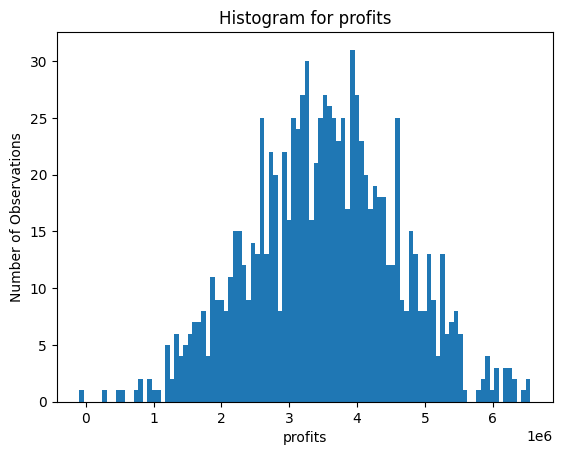

Region 1


count    1.000000e+03
mean     4.422924e+06
std      2.143915e+06
min     -1.662125e+06
25%      2.923657e+06
50%      4.336381e+06
75%      5.816521e+06
max      1.211102e+07
Name: profits, dtype: float64

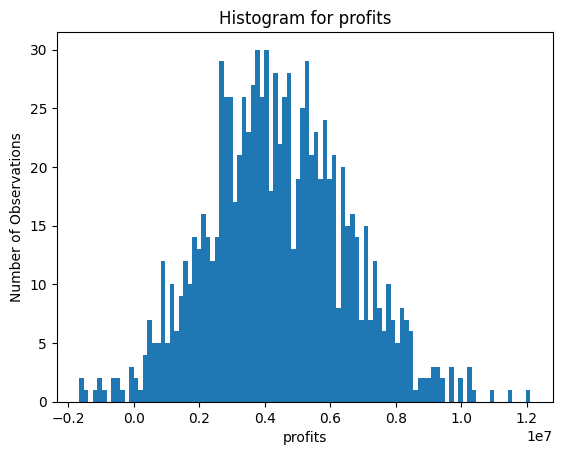

Region 2


count    1.000000e+03
mean     2.783379e+06
std      1.015324e+06
min     -1.022114e+05
25%      2.093721e+06
50%      2.823572e+06
75%      3.489851e+06
max      5.935459e+06
Name: profits, dtype: float64

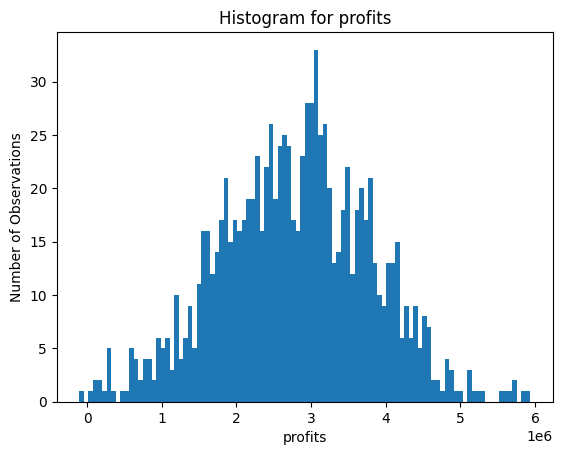

In [20]:
# Examine bootstrapped profit distributions 

profits_g0 = bootstrap(pd.Series(predicted_g0_all))
profits_g1 = bootstrap(pd.Series(predicted_g1_all))
profits_g2 = bootstrap(pd.Series(predicted_g2_all))

print('Region 0')
histo(pd.Series(profits_g0).to_frame(name='profits'), 'profits')
print('Region 1')
histo(pd.Series(profits_g1).to_frame(name='profits'), 'profits')
print('Region 2')
histo(pd.Series(profits_g2).to_frame(name='profits'), 'profits')

In [21]:
# Calculate risk and profit for each region

profits_list = [profits_g0, profits_g1, profits_g2]

for i in range(3):
    avg_profit = np.mean(profits_list[i])
    conf_interval = np.percentile(profits_list[i], [2.5, 97.5])
    risk_of_loss = (np.array(profits_list[i]) < 0).mean() * 100

    print(f"Region {i}")
    print(f"Average Profit: ${avg_profit:,.0f}")
    print(f"95% Confidence Interval: (${conf_interval[0]:,.0f} - ${conf_interval[1]:,.0f})")
    print(f"Risk of Loss: {risk_of_loss}%")
    print()

Region 0
Average Profit: $3,514,879
95% Confidence Interval: ($1,396,863 - $5,526,976)
Risk of Loss: 0.1%

Region 1
Average Profit: $4,422,924
95% Confidence Interval: ($483,640 - $8,764,372)
Risk of Loss: 1.5%

Region 2
Average Profit: $2,783,379
95% Confidence Interval: ($741,015 - $4,618,974)
Risk of Loss: 0.1%



The bootstrapped distributions are all normal, as expected. None of the regions reaches a risk of loss greater than 2.5%, the project threshold, so all are eligible for exploration. Regions 0 and 2 have similar sized 95% confidence intervals with the latter shifted somewhat to the right. The 95% confidence interval for region 1 is about twice as wide as those for the other regions, giving it the most risk of negative profits (1.5%) but also the most potential profit. Region 1 has the highest average profit (\\$4.42 million) by a substantial margin (region 0 = \\$3.51 million and region 2 = \\$2.78 million). 

That contradicts all previous analyses, which consistently found region 1 with the lowest reserves and profits. I will follow-up by performing the same analysis on the targets instead of the predictions.

Region 0


count    1.000000e+03
mean     2.389593e+07
std      1.909970e+06
min      1.754782e+07
25%      2.262258e+07
50%      2.393134e+07
75%      2.521075e+07
max      2.946214e+07
Name: profits, dtype: float64

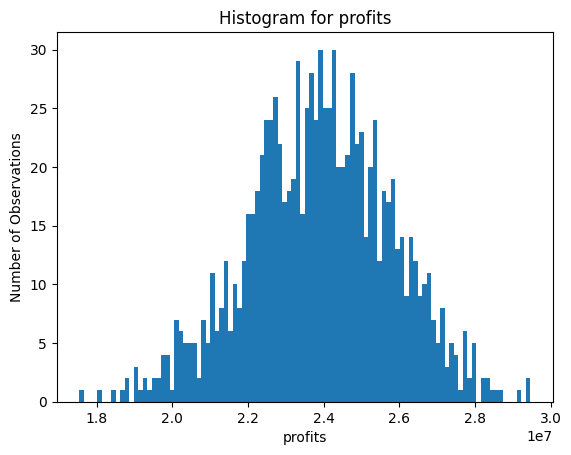

Region 1


count    1.000000e+03
mean     4.455190e+06
std      2.126805e+06
min     -1.665796e+06
25%      2.991883e+06
50%      4.385004e+06
75%      5.856497e+06
max      1.213262e+07
Name: profits, dtype: float64

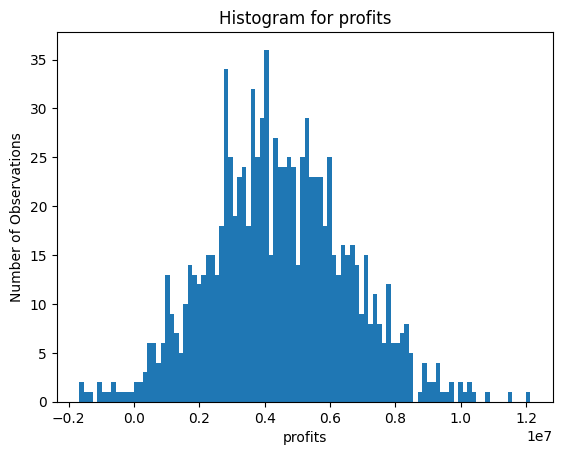

Region 2


count    1.000000e+03
mean     2.630277e+07
std      2.055566e+06
min      2.013687e+07
25%      2.476127e+07
50%      2.635944e+07
75%      2.775677e+07
max      3.252112e+07
Name: profits, dtype: float64

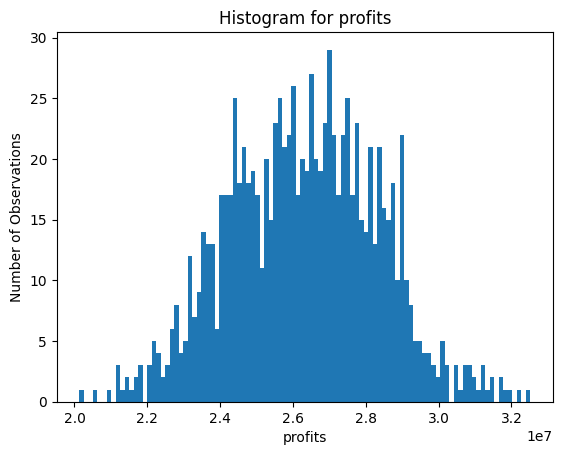

In [22]:
# Examine bootstrapped profit distributions for targets

profits_g0_target = bootstrap(pd.Series(target_g0_all))
profits_g1_target = bootstrap(pd.Series(target_g1_all))
profits_g2_target = bootstrap(pd.Series(target_g2_all))

print('Region 0')
histo(pd.Series(profits_g0_target).to_frame(name='profits'), 'profits')
print('Region 1')
histo(pd.Series(profits_g1_target).to_frame(name='profits'), 'profits')
print('Region 2')
histo(pd.Series(profits_g2_target).to_frame(name='profits'), 'profits')

In [23]:
# Calculate risk and profit for each region using targets

profits_list = [profits_g0_target, profits_g1_target, profits_g2_target]

for i in range(3):
    avg_profit = np.mean(profits_list[i])
    conf_interval = np.percentile(profits_list[i], [2.5, 97.5])
    risk_of_loss = (np.array(profits_list[i]) < 0).mean() * 100

    print(f"Region {i}")
    print(f"Average Profit: ${avg_profit:,.0f}")
    print(f"95% Confidence Interval: (${conf_interval[0]:,.0f} - ${conf_interval[1]:,.0f})")
    print(f"Risk of Loss: {risk_of_loss:.2f}%")
    print()

Region 0
Average Profit: $23,895,930
95% Confidence Interval: ($19,934,758 - $27,550,878)
Risk of Loss: 0.00%

Region 1
Average Profit: $4,455,190
95% Confidence Interval: ($530,496 - $8,816,011)
Risk of Loss: 1.40%

Region 2
Average Profit: $26,302,768
95% Confidence Interval: ($22,285,058 - $30,287,251)
Risk of Loss: 0.00%



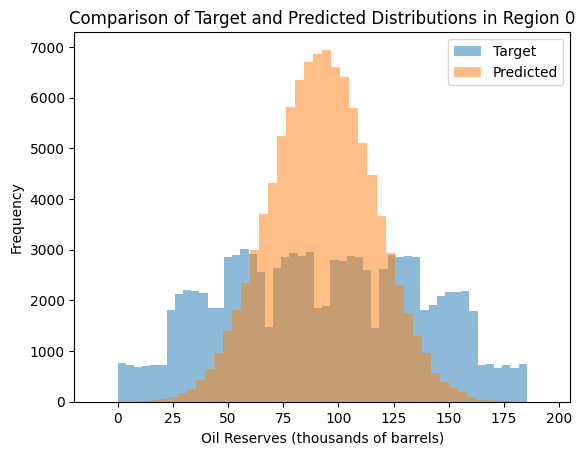

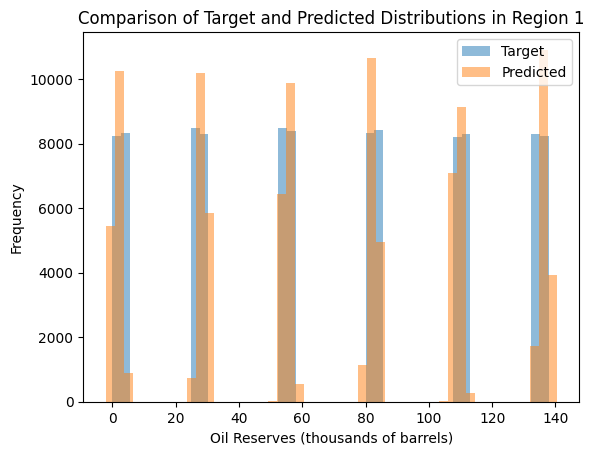

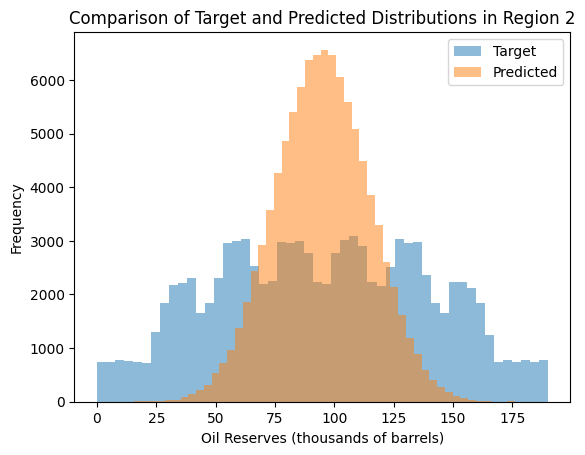

In [24]:
# Examine target and predicted distributions

target_list = [target_g0_all, target_g1_all, target_g2_all]
predicted_list = [predicted_g0_all, predicted_g1_all, predicted_g2_all]

for i in range(3):
    plt.hist(target_list[i], bins=50, alpha=0.5, label='Target')
    plt.hist(predicted_list[i], bins=50, alpha=0.5, label='Predicted')
    plt.legend()
    plt.xlabel('Oil Reserves (thousands of barrels)')
    plt.ylabel('Frequency')
    plt.title(f"Comparison of Target and Predicted Distributions in Region {i}")
    plt.show()

The average profit using targets instead of predictions is the same for region 1 but drastically different for regions 0 and 2, which increase by factors of about 7 and 9, respectively. Whereas region 1 is the most profitable using predictions (\\$4.42 million), region 2 is the most profitable using targets (\\$26.30 million). The latter is nearly six times greater than the former!

I think this spectacular divergence of results is best explained by distributional differences. Targets have a higher standard deviation, which implies that their upper tail is more extreme than that of predictions. Since the profit calculation uses only the upper tail of the distribution, the more widely dispersed targets are much more profitable than the predictions. That only applies in regions 0 and 2 because the limited range of targets in region 1 (and the subsequently much better performing regression model) eliminates any difference between the target and prediction distributions. The profit calculation and bootstrapping method further exaggerate a modest difference in mean reserves into a huge difference in profits. 

# General Discussion #

This project aims to train a model to help suggest a region for the development of oil wells by the OilyGiant mining company. I imported and prepared the data, trained models to predict oil reserves for mines in each region, calculated the likely profit for each region, and employed bootstrapping to estimate the risk of nonprofits. 

Some of the features and targets have unusual distributions. The targets for all regions are far from normal and those for region 1 are discrete and extremely restricted in range. Something unique about region 1 makes it different from the others and affects model performance. The linear regression model for region 1 is almost perfect (R^2 = 1) but those for region 0 (R^2 = 0.28) and region 2 (R^2 = 0.21) are quite poor. 

Given the business conditions and costs of doing business, only wells with reserves greater than 111 units (thousands of barrels) turn a profit. That is more than the average reserves in any of the regions, but profits are only derived from the top 200 wells in a sample of 500 taken in each region. The average predicted reserves in the top 200 wells surpasses the 111-unit threshold in every region with the best being region 0 (163.22 units). Profitability should not be a problem. 

Estimating profits for the top 200 reserves in each region confirms that region 1 is roughly half as profitable as the other two regions. Estimations using targets (actual reported data) are on the order of twice as large as those using model predictions for regions 0 and 2 but not for region 1. That is explained by the far superior performance of the model for region 1, which is much less likely to underestimate reserves. Whereas region 2 is the most profitable (\\$71 million) using targets, region 0 is the most profitable (\\$47 million) using predictions. The model diverges from reality. 

Confidence intervals estimated with bootstrapping reveal risks of financial losses well below the project threshold of 2.5% for all three regions. The only question is which region is likely to be the most profitable. Surprisingly, region 1 has the highest average predicted profit (\\$4.42 million) according to the bootstrapped estimates. That contradicts all the previous analyses, which consistently found region 1 with the least reserves and profits. 

Comparing bootstrapped profit estimates using targets instead of predictions drastically changes the results. Using targets, region 1 is once again the least profitable region by a large measure. Region 2 is the most profitable with \\$26.30 million, nearly six times the profit of region 1 (\\$4.46 million). Using targets instead of predictions affects regions 0 and 2 much more than region 1 because of those quirks in its distribution discussed earlier. Although the near-perfect linear regression model for region 1 produces very accurate predictions, those for regions 0 and 2 are quite inaccurate and narrow the distributions considerably. Such narrow distributions systematically underestimate the upper tail, including the top 200 wells used for the profit calculation. The best predicted wells are less lucrative than the best target wells. That dynamic is exacerbated by bootstrapping, which eliminates most of the upper tail, and the profit formula itself. All those factors add up to greatly underestimate the profitability of wells in regions 0 and 2 but not in region 1. 

This project offers a great lesson about the perils of modeling. Models can be extremely effective or not, depending on various factors. Relying on poorly performing models can lead to misunderstandings and bad decisions. If I were to base my recommendation to OilyGiant on the results of the models, I would have to select region 1 for further development. There are warning signs from earlier analyses that conflict with the final result, but the bootstrapped estimates clearly favor region 1. Having done the analysis using targets instead of predictions, I know that recommending region 1 is a mistake. It is reliably profitable but by far the least lucrative region. Regions 0 and 2 would both be much better recommendations, with region 2 the ultimate victor. I suppose the lesson is to try several different analyses, look for inconsistencies, and be wary of poorly fitting models or suspicious distributions. 